# UBId-vgawade
# Email id - vgawade@buffalo.edu
# ML Proj 3-Classification

# Functions

In [43]:
import pandas as pd
import numpy as np
import csv
import itertools
import matplotlib.pyplot as plt 

def GenerateVectorFromCSV(filePath):
    list=[];
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi);
        for row in reader:
            i=0;
            for column in row:
                if(i==1):
                    list.append(int(float(column)));
                i=i+1;
    return list;

def saveStateInFile(fileName,arr):
    df = pd.DataFrame(arr)
    df.to_csv(fileName, header=None)
    
def getCombineModelPrediction(NN,RF,SVM,LG):
    zz=np.zeros(((len(NN)),10));
    combine=[]
    for i in range(0,len(NN)):
        zz[i][NN[i]]=zz[i][NN[i]]+1;
        zz[i][RF[i]]=zz[i][RF[i]]+1;
        zz[i][SVM[i]]=zz[i][SVM[i]]+1;
        zz[i][LG[i]]=zz[i][LG[i]]+1;
    combine=np.argmax(zz,axis=1)
    return combine;

#using confusion matrix for calculating accuracy
def getAccuracy(confusionMM):
    #add diagonal elements
    correct=np.trace(confusionMM);
    accuracy=correct/(confusionMM.sum());
    return accuracy*100;

# Function to generate target values which will be used as a reference for relevance testing
def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    #print("Raw Training Generated..")
    #print (t)
    return t

def GetSoftMaxValTest(VAL_FEATURE,W):
#     sigmoid =  (1/(1+np.e**(-np.dot(TRAINING_PHI[i],np.transpose(W_Now)))))
#     Y = np.dot(W,np.transpose(VAL_PHI))
#     Y = (1/(1+np.e**(-np.dot(VAL_FEATURE,np.transpose(W)))))
    z = (np.dot(VAL_FEATURE,np.transpose(W)))
    
    Y = (np.exp(z)/np.sum(np.exp(z)))
    
    ##print ("Test Out Generated..")
#     print(Y)
    return Y

def getCategoricalCrossEntropy(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    
    for i in range (0,len(VAL_TEST_OUT)):
        # We generate the sum of squared error. This sum is further used to calculate the root mean squared error.
        
        op = ValDataAct[i][np.argmax(ValDataAct[i])]
        predict = VAL_TEST_OUT[i][np.argmax(ValDataAct[i])]
        
        sum = sum-op*math.log(predict)
        
        # The counter is incremented every time predicted and target values are same. 
        # This counter value is used to calculate the accuracy
        if(np.argmax(ValDataAct[i]) == np.argmax(VAL_TEST_OUT[i])):
#         if(int(predict) == op):
#         if(int(VAL_TEST_OUT[i]) >= 0.1):
            counter = counter + 1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

def getSoftmaxVal(z):
    s_max = (np.exp(z)/np.sum(np.exp(z)))
    return s_max

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    classes=[0,1,2,3,4,5,6,7,8,9]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# USPS Preprocess

In [44]:
from PIL import Image
import os
import numpy as np

USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
            
USPSMat=np.asarray(USPSMat)
uspsGold=USPSTar

# MNIST Preprocess

In [45]:
from sklearn.datasets import fetch_mldata
from keras.datasets import mnist
# mnist = fetch_mldata('MNIST original')
# n_train = 60000
# n_test = 10000
# indices = np.arange(len(mnist.data))
# train_idx = np.arange(0,n_train)
# test_idx = np.arange(n_train,n_train+n_test)
# X_train,y_train = mnist.data[train_idx], mnist.target[train_idx]
# X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]

# print(X_train.shape)
# print(y_train.shape)

trainLen = 60000
testLen = 10000
imageVector = 784
numClasses = 10

(trainData, trainLabel), (testData, testLabel) = mnist.load_data()

trainData = trainData.reshape(trainLen,imageVector)
testData = testData.reshape(testLen,imageVector)

trainData = trainData.astype("float32")
testData = testData.astype("float32")

trainData = trainData/255
testData = testData/255

# exampleNumber = 2 #Pick the example we want to visualize
# example = trainData[0][exampleNumber,:] #Then we load that example.
# plt.imshow(np.reshape(example,[28,28])) #Next we reshape it to 28x28 and display it.

tel=testLabel;
trl=trainLabel;

y_train = trainLabel
X_train   = (trainData)
X_test = testData
y_test = (testLabel)


# 1.Neural Network Classifier

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
__________

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:100: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.5131 - acc: 0.8449 - val_loss: 0.2231 - val_acc: 0.9318
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2155 - acc: 0.9370 - val_loss: 0.1454 - val_acc: 0.9557
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1594 - acc: 0.9528 - val_loss: 0.1125 - val_acc: 0.9639
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1256 - acc: 0.9626 - val_loss: 0.0953 - val_acc: 0.9697
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1042 - acc: 0.9692 - val_loss: 0.0975 - val_acc: 0.9671
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0895 - acc: 0.9726 - val_loss: 0.0804 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0800 - acc: 0.9750 - val_loss: 0.0821 - val_acc

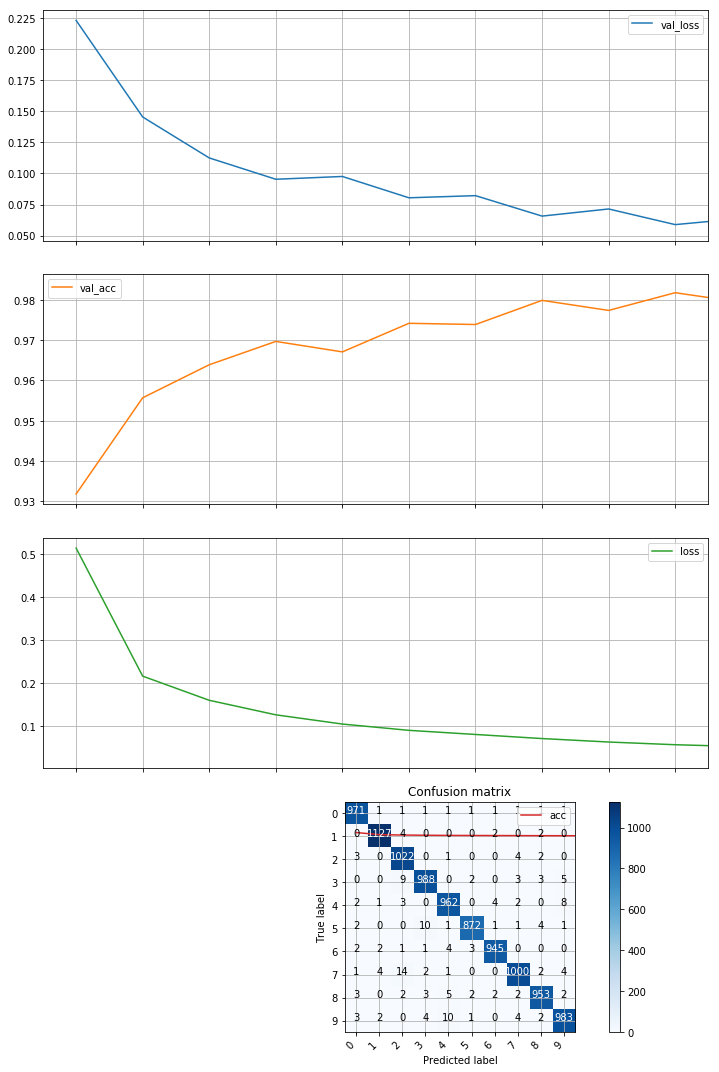

In [46]:
from keras.datasets import mnist
from keras import optimizers

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot
from matplotlib import pyplot as plt

# (trainData, trainLabel), (testData, testLabel) = mnist.load_data()



# trainLen = 60000
# testLen = 10000
# imageVector = 784
# numClasses = 10

# # print(trainData.shape)
# trainData = trainData.reshape(trainLen,imageVector)
# testData = testData.reshape(testLen,imageVector)

# trainData = trainData.astype("float32")
# testData = testData.astype("float32")

# trainData = trainData/255
# testData = testData/255

#saving labels
MNISTOrgTar=y_test
trainData = X_train
testData = X_test
trainLabel = y_train
testLabel = y_test
# print(y_test.shape)
# print(X_train.shape)
# # # Converts a class vector (integers) to binary class matrix.No. of rows remains the same
trainLabel = keras.utils.to_categorical(trainLabel, numClasses)
testLabel = keras.utils.to_categorical(testLabel, numClasses)

# print("Training data shape: ", trainLabel.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
# print("Test data shape", testLabel.shape) # (10000, 28, 28) -- 10000 images, each 28x28

drop_out = 0.3
#features sub 1st try
# first_dense_layer_nodes = 128
# second_dense_layer_nodes = 64

#featyre sub 2 
first_dense_layer_nodes = 512
second_dense_layer_nodes = 256
final_dense_layer_nodes = 10

# We use a dense layer since each neuron is connected to each neuron in the next layer. Each neuron has a randomly generated weight assigned to it. 
# A weighted sum is passed to this first hidden layer. This weighted sum is linear in nature and is further passed to an activation function to generate non-linearity.

model = Sequential()
model.add(Dense(first_dense_layer_nodes, input_dim=imageVector))
model.add(Activation('relu'))

# Dropout is a regularization technique used to reduce the inter dependencies between neurons in which data samples are dropped randomly from the network during computations. Using dropout helps prevent overfitting.
model.add(Dropout(drop_out))

model.add(Dense(second_dense_layer_nodes))
model.add(Activation('relu'))

model.add(Dropout(drop_out))

model.add(Dense(final_dense_layer_nodes))
model.add(Activation('softmax'))
# We use softmax as it is a multi classifier. 



# Categorial Crossentropy is a loss function which is used for multi classification. We use Categorial crossentropy to measure losses generated during each epoch.
# Losses are reduced by updating weights for the next epoch with the help of an optimizer which is Adadelta .
model.summary()
model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])


validation_data_split = 0.2
num_epochs = 20
model_batch_size = 512
tb_batch_size = 128
early_patience = 1000

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')


history = model.fit(trainData, trainLabel, validation_data=(testData, testLabel),validation_split=0.2, nb_epoch=num_epochs, batch_size=model_batch_size, callbacks = [tensorboard_cb,earlystopping_cb])

score = model.evaluate(testData, testLabel, batch_size=model_batch_size)
pred_nn=model.predict(x=testData, batch_size=model_batch_size, verbose=0, steps=None)
labels = np.argmax(pred_nn, axis=1) 
confo=confusion_matrix(MNISTOrgTar, labels);

%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# print("Accuracy for NN on MNIST: %.2f%%"%(score[1]*100))
print("Accuracy for NN on MNIST:",getAccuracy(confo));
saveStateInFile("NN_Predict.csv",labels)
print("Confusion Matrix for NN on MNIST:\n")
plot_confusion_matrix(confo,title='Confusion matrix')

# USPS Test on NN

(19999, 10)
19999/19999 [==============================] - 0s 19us/step
[4 0 0 ... 9 1 7]
Accuracy for NN on USPS: 51.52257612880644
Confusion Matrix for NN USPS:



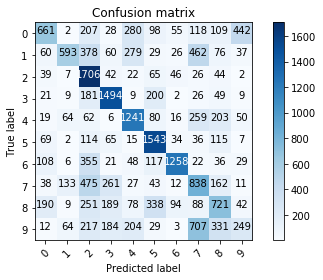

In [47]:
USPSOrgTar=USPSTar;
USPSTar = keras.utils.to_categorical(USPSTar, numClasses)
print(USPSTar.shape)
score = model.evaluate(USPSMat, USPSTar, batch_size=model_batch_size)
# print("Accuracy for NN USPS: %.2f%%"%(score[1]*100))
pred_nnu=model.predict(x=USPSMat, batch_size=model_batch_size, verbose=0, steps=None)
labelsforNNUSPS = np.argmax(pred_nnu, axis=1) 
print(labelsforNNUSPS)
confo=confusion_matrix(USPSOrgTar, labelsforNNUSPS);
print("Accuracy for NN on USPS:",getAccuracy(confo));
print("Confusion Matrix for NN USPS:\n");
plot_confusion_matrix(confo,title='Confusion matrix')
saveStateInFile("NN_Predict_USPS.csv",labelsforNNUSPS)

# 2.Random Forest Classifier

Random Forest accuracy:  96.86
Confusion Matrix for RF MNIST:



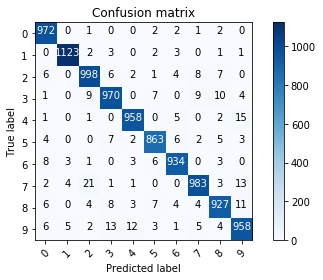

In [48]:
# RandomForest
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
# n_train = 60000
# n_test = 10000
# indices = np.arange(len(mnist.data))
# train_idx = np.arange(0,n_train)
# test_idx = np.arange(n_train,n_train+n_test)
# X_train,y_train = mnist.data[train_idx], mnist.target[train_idx]
# X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]
#RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=100); 
classifier2.fit(X_train, y_train)
y_pred_rf = classifier2.predict(X_test)
# acc_rf = accuracy_score(y_test, y_pred_rf)
# print(y_pred_rf)
confo=confusion_matrix(y_test, y_pred_rf);
#save results in csv for future use
saveStateInFile("RF_Predict.csv",y_pred_rf)
print ("Random Forest accuracy: ",getAccuracy(confo))
print("Confusion Matrix for RF MNIST:\n")
plot_confusion_matrix(confo,title='Confusion matrix')

# USPS Test for RF

Accuracy for RF USPS:  39.60698034901745
Confusion Matrix for RF USPS:



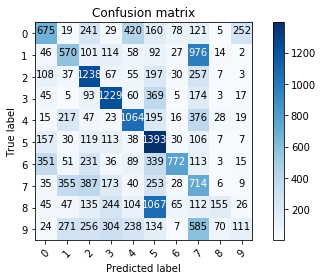

In [49]:
pref_RF_USPS = classifier2.predict(USPSMat)
# print(pref_RF_USPS)
acc_rf = accuracy_score(USPSOrgTar, pref_RF_USPS)
confo=confusion_matrix(USPSOrgTar, pref_RF_USPS);
print("Accuracy for RF USPS: ",getAccuracy(confo))
print("Confusion Matrix for RF USPS:\n")
plot_confusion_matrix(confo,title='Confusion matrix')
saveStateInFile("RF_Predict_USPS.csv",pref_RF_USPS)

# 3.SVM Classifier

In [50]:
# SVM 
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
classifier1 = SVC(kernel='linear', C=2, gamma = 1);
classifier1.fit(X_train, y_train)
# print(sklearn.__version__)
y_pred_rf = classifier1.predict(X_test)
# acc_rf = accuracy_score(y_test, y_pred_rf)
# confo=confusion_matrix(y_test, y_pred_rf);
# saveStateInFile("SVM_Predict.csv",y_pred_rf)
# print ("SVM accuracy: ",getAccuracy(confo))
# print("Confusion Matrix for RF USPS:\n")
# plot_confusion_matrix(confo,title='Confusion matrix')

SVM accuracy:  93.8
Confusion Matrix for SVM MNIST:



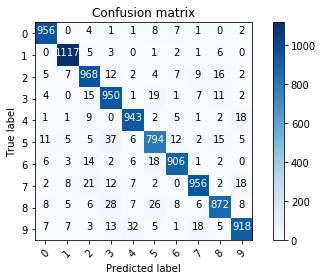

In [51]:
confo=confusion_matrix(y_test, y_pred_rf);
saveStateInFile("SVM_Predict.csv",y_pred_rf)
print ("SVM accuracy: ",getAccuracy(confo))
print("Confusion Matrix for SVM MNIST:\n")
plot_confusion_matrix(confo,title='Confusion matrix')

# USPS Test for SVM

Accuracy for SVM USPS:  28.42642132106605
Confusion Matrix for SVM USPS:



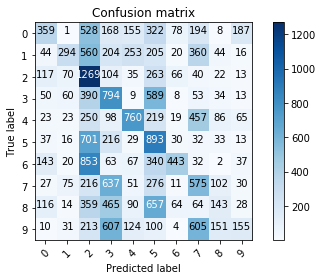

In [52]:
pref_SVM_USPS = classifier1.predict(USPSMat)
# print(pref_SVM_USPS)
# acc_rf = accuracy_score(uspsGold, pref_SVM_USPS)
confo=confusion_matrix(uspsGold, pref_SVM_USPS);
print("Accuracy for SVM USPS: ",getAccuracy(confo))
print("Confusion Matrix for SVM USPS:\n")
plot_confusion_matrix(confo,title='Confusion matrix')
saveStateInFile("SVM_Predict_USPS.csv",pref_SVM_USPS)

# 4.Logistic Regression Classifier

Accuracy for Logistic MNIST:  91.16
Confusion Matrix for Logistic MNIST:



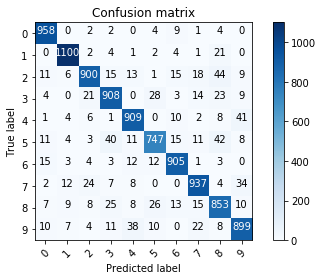

In [53]:
import math
from keras.utils import np_utils
from keras.datasets import mnist


trainLen = 60000
testLen = 10000
imageVector = 784
numClasses = 10

(trainData, trainLabel), (testData, testLabel) = mnist.load_data()

trainData = trainData.reshape(trainLen,imageVector)
testData = testData.reshape(testLen,imageVector)

trainData = trainData.astype("float32")
testData = testData.astype("float32")

trainData = trainData/255
testData = testData/255

# exampleNumber = 2 #Pick the example we want to visualize
# example = trainData[0][exampleNumber,:] #Then we load that example.
# plt.imshow(np.reshape(example,[28,28])) #Next we reshape it to 28x28 and display it.



TrainingTarget = np_utils.to_categorical(trainLabel,numClasses)
TrainingData   = (trainData)
TestDataAct = np_utils.to_categorical(testLabel,numClasses)
TestData = (testData)

# TrainingTarget = trl
# TrainingData   = (X_train)
# TestDataAct = tel
# TestData = (X_test)

# print(TrainingData.shape)
# print(TrainingTarget.shape)
# print(TestData.shape)
# print(TestDataAct.shape)


Wts = np.random.normal(loc = 0.0, scale = 0.01, size = (len(TrainingTarget[0]),len(TrainingData[0])))

#we are getting final weights from this for predicting results 
W_Now        = np.dot(1, Wts)
bias = np.zeros((1,1))
# print(W_Now.shape)
La           = 0.0001
# La=0.001
learningRate = 0.5
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []
Accuracy_Test = []
logLosses = [] 
epochs=10

batchSize = 2048
for i in range(0,epochs):
    for j in range(0,trainLen,batchSize):
            sumDelta_ED = 0
            if(j+batchSize<=trainLen):
                endPoint = j+batchSize
            else:
                endPoint = trainLen - (j+batchSize)
            for k in range(j, endPoint):
                z = (np.dot((W_Now),TrainingData[k]))
                soft_max = getSoftmaxVal(z)
                error = (TrainingTarget[k] - soft_max).reshape(10,1)
                train = TrainingData[k].reshape(1,784)
                Delta_ED     = -np.dot(error,train)
                sumDelta_ED += Delta_ED

            Delta_E_D = (sumDelta_ED/batchSize)
            La_Delta_E_W  = np.dot(La,W_Now)
            Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
            Delta_W       = -np.dot(learningRate,Delta_E)
            W_T_Next      = W_Now + Delta_W
            W_Now         = W_T_Next

            #-----------------TrainingData Accuracy---------------------#
        #     TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
        #     TR_TEST_OUT = GetSigmoidValTest(TRAINING_PHI,W_T_Next)
            TR_TEST_OUT = GetSoftMaxValTest(TrainingData,W_T_Next)
        #     Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
            Erms_TR       = getCategoricalCrossEntropy(TR_TEST_OUT,TrainingTarget)

            L_Erms_TR.append(float(Erms_TR.split(',')[1]))

            #-----------------ValidationData Accuracy---------------------#
        #     VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next)
        #     VAL_TEST_OUT = GetSigmoidValTest(VAL_PHI,W_T_Next)
        #     VAL_TEST_OUT = GetSoftMaxValTest(ValData,W_T_Next)
        #     Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
        #     L_Erms_Val.append(float(Erms_Val.split(',')[1]))

            #-----------------TestingData Accuracy---------------------#
        #     TEST_OUT      = GetValTest(TEST_PHI,W_T_Next)
        #     TEST_OUT = GetSigmoidValTest(TEST_PHI,W_T_Next)
    #         TEST_OUT = GetSoftMaxValTest(TestData,W_T_Next)
    #         Erms_Test = getCategoricalCrossEntropy(TEST_OUT,TestDataAct)
    #         L_Erms_Test.append(float(Erms_Test.split(',')[1]))



    #     #     logLoss = np.mean(-y * np.log(sigmoid) - (1 - y) * np.log(1 - sigmoid))
    #     #     print(str(logLoss)) #logLosses.append((logLoss))

    #         Accuracy_Test.append(float(Erms_Test.split(',')[0]))
        #     print(str(float(Erms_Test.split(',')[0])))

# plt.plot(L_Erms_Test)
# plt.show()

# plt.plot(Accuracy_Test)
# plt.show()

#MNIST logistic test
pref_Logi_MNIST = GetSoftMaxValTest(testData,W_T_Next)
# print(pref_Logi_MNIST)
labels = np.argmax(pref_Logi_MNIST, axis=1) 
confo=confusion_matrix(testLabel, labels);
print("Accuracy for Logistic MNIST: ",getAccuracy(confo))
print("Confusion Matrix for Logistic MNIST:\n")
plot_confusion_matrix(confo,title='Confusion matrix')
saveStateInFile("Logistic_Predict.csv",labels)


# print ('----------Logistic Regression Solution--------------------')
# # print ("Training Accuracy = " + (str(float(Erms_TR.split(',')[0]))))
# # print ("Validation Accuracy = " + (str(float(Erms_Val.split(',')[0]))))
# print ("Accuracy for logistic MNIST= " + (str(float(Erms_Test.split(',')[0]))))


# print(Wts)

# USPS Test for Logistic

Accuracy for Logistic USPS:  35.60678033901695
Confusion Matrix for Logistic USPS:



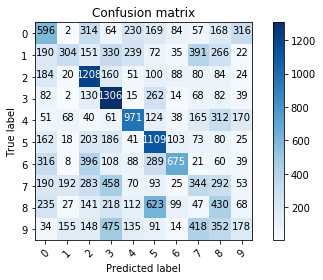

In [54]:
pref_Logi_USPS = GetSoftMaxValTest(USPSMat,W_T_Next)
# print(pref_Logi_USPS)
labels = np.argmax(pref_Logi_USPS, axis=1)
confo=confusion_matrix(uspsGold, labels);
print("Accuracy for Logistic USPS: ",getAccuracy(confo))
print("Confusion Matrix for Logistic USPS:\n")
plot_confusion_matrix(confo,title='Confusion matrix')
saveStateInFile("Logistic_Predict_USPS.csv",labels)

# 5.Ensembler (Majority Voting) for MNIST

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


Accuracy of ensembler on MNIST 96.35000000000001
Confusion Matrix for ensembler on MNIST:



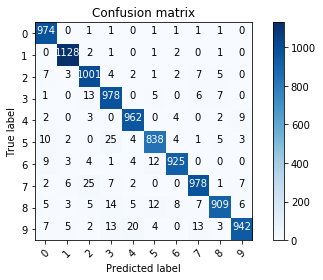

In [55]:
RF=GenerateVectorFromCSV("RF_Predict.csv");
# print(np.asarray(RF).shape)
NN=GenerateVectorFromCSV("NN_Predict.csv");
# print(np.asarray(NN).shape);
Logistic=GenerateVectorFromCSV("Logistic_Predict.csv");
# print(np.asarray(SVM).shape);
SVM=GenerateVectorFromCSV("SVM_Predict.csv");
# print(np.asarray(SVM).shape);
predict=getCombineModelPrediction(NN,RF,SVM,Logistic);
# print(predict)
confusionMM=confusion_matrix(MNISTOrgTar, predict);
print("Accuracy of ensembler on MNIST",getAccuracy(confusionMM));
print("Confusion Matrix for ensembler on MNIST:\n")
plot_confusion_matrix(confusionMM,title='Confusion matrix')

# Ensembler (Majority Voting) for USPS

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


Accuracy of ensembler on USPS 42.04710235511776
Confusion Matrix for ensembler on MNIST:



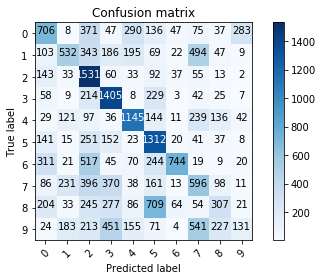

In [56]:
RF=GenerateVectorFromCSV("RF_Predict_USPS.csv");
# print(np.asarray(RF).shape)
NN=GenerateVectorFromCSV("NN_Predict_USPS.csv");
# print(np.asarray(NN).shape);
Logistic=GenerateVectorFromCSV("Logistic_Predict_USPS.csv");
# print(np.asarray(SVM));
SVM=GenerateVectorFromCSV("SVM_Predict_USPS.csv");
# print(np.asarray(SVM).shape);
predict=getCombineModelPrediction(NN,RF,SVM,Logistic);
confusionMM=confusion_matrix(USPSOrgTar, predict);
# correct=np.trace(confusionMM);
# accuracy=correct/len(NN);
print("Accuracy of ensembler on USPS",getAccuracy(confusionMM));
print("Confusion Matrix for ensembler on MNIST:\n")
plot_confusion_matrix(confusionMM,title='Confusion matrix')